# WELCOME!

Welcome to **"Bike Demand Visualization Project"**. As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---



# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [373]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [374]:
df = pd.read_csv('store_sharing.csv')
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [375]:
missing_values = df.isnull().sum()
missing_values

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [376]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

Text(0.5, 1.0, 'Distribution of Seasons')

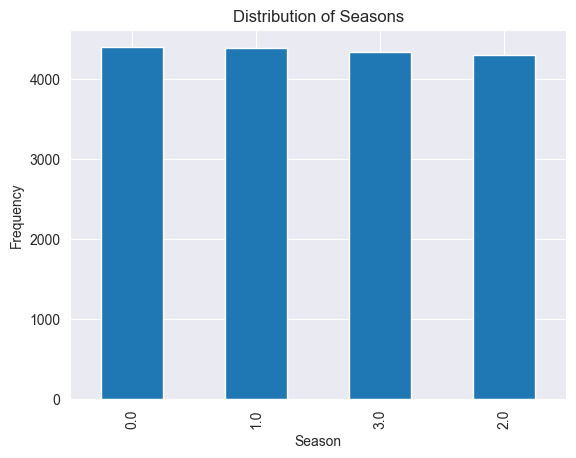

In [377]:
df['season'].value_counts().plot(kind = 'bar')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.title('Distribution of Seasons')
# plt.show()

Text(0.5, 1.0, 'Distribution of Days')

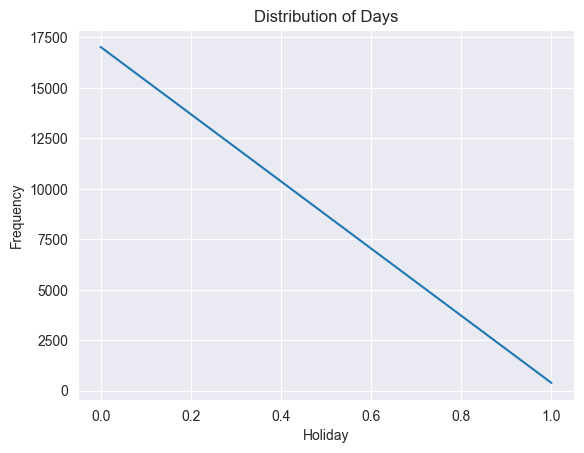

In [378]:
df['is_holiday'].value_counts().plot(kind='line')
plt.xlabel('Holiday')
plt.ylabel('Frequency')
plt.title('Distribution of Days')
# plt.show()

Text(0.5, 1.0, 'Distribution of Weekend')

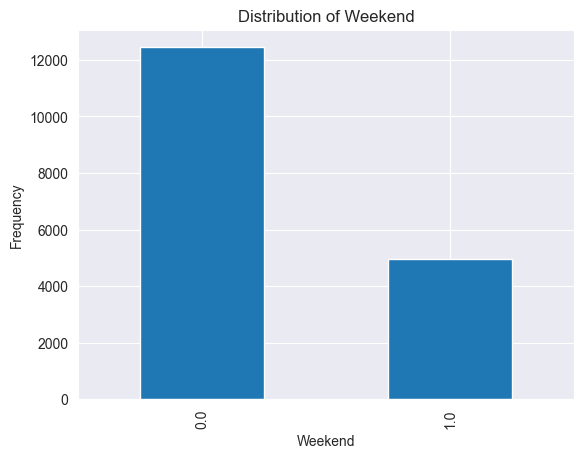

In [379]:
df['is_weekend'].value_counts().plot(kind='bar')
plt.xlabel('Weekend')
plt.ylabel('Frequency')
plt.title('Distribution of Weekend')
# plt.show()

Text(0.5, 1.0, 'Distribution of Weather Codes')

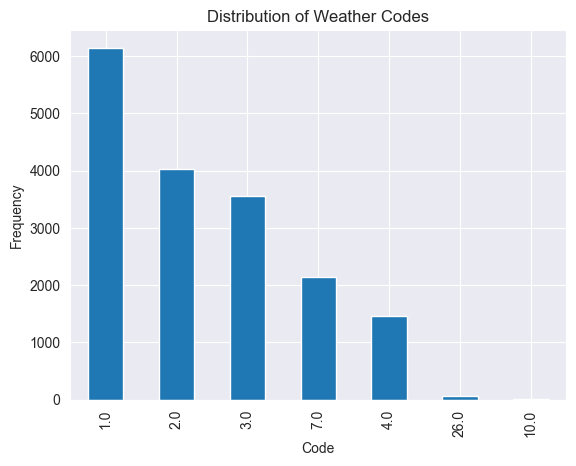

In [380]:
df['weather_code'].value_counts().plot(kind='bar')
plt.xlabel('Code')
plt.ylabel('Frequency')
plt.title('Distribution of Weather Codes')
# plt.show()

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [381]:
data_types = df.dtypes
data_types

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [382]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# df.set_index('timestamp', inplace= True)
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [383]:
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['year_of_month'] = pd.DatetimeIndex(df['timestamp']).month
df['month'] = pd.DatetimeIndex(df['timestamp']).month_name()
df['day_of_month'] = pd.DatetimeIndex(df['timestamp']).day
df['day_of_week'] = pd.DatetimeIndex(df['timestamp']).day_name()
df['hour'] = pd.DatetimeIndex(df['timestamp']).hour
df


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,year_of_month,month,day_of_month,day_of_week,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,January,4,Sunday,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,January,4,Sunday,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,January,4,Sunday,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,January,4,Sunday,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,January,4,Sunday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,January,3,Tuesday,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,January,3,Tuesday,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,January,3,Tuesday,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,January,3,Tuesday,22


In [384]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,year_of_month,month,day_of_month,day_of_week,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,January,4,Sunday,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,January,4,Sunday,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,January,4,Sunday,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,January,4,Sunday,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,January,4,Sunday,4


### 7.Visualize the correlation with a heatmap

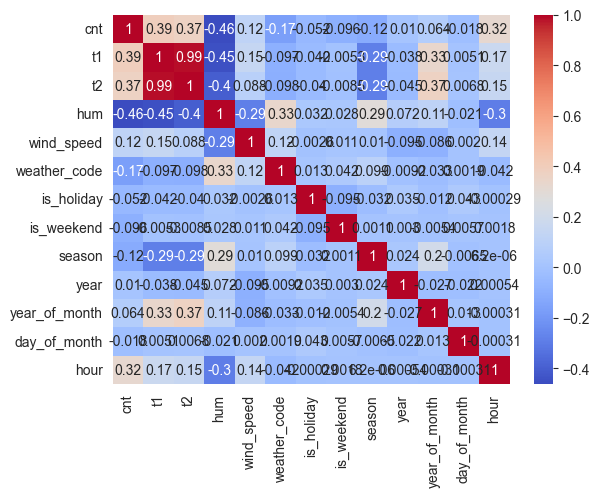

In [385]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [386]:
# corr = df.corr()['cnt']
# sns.heatmap(corr, annot = True, cmap = 'coolwarm')
# plt.show()

### 8. Visualize the correlation of the target variable and the other features with barplot

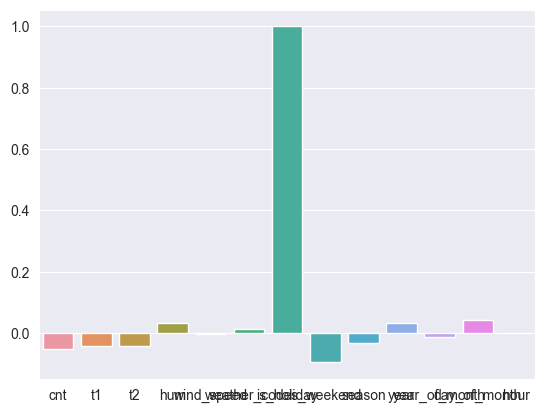

In [387]:
corr = df.corr()['is_holiday']
sns.barplot(x = corr.index, y = corr.values)
plt.show()

### 9.Plot bike shares over time use lineplot

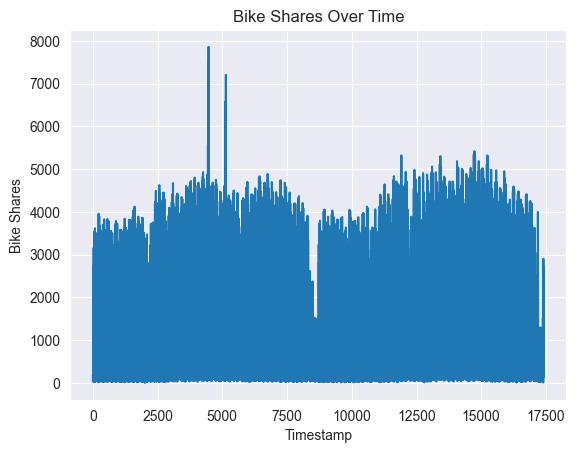

In [388]:
plt.plot(df.index, df['cnt'])
plt.xlabel('Timestamp')
plt.ylabel('Bike Shares')
plt.title('Bike Shares Over Time')
plt.show()

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [389]:
grouped = df.groupby(['year_of_month', 'month'])['cnt'].sum()

grouped

year_of_month  month    
1              January      1166837
2              February     1136504
3              March        1352461
4              April        1600427
5              May          1897348
6              June         1967130
7              July         2286214
8              August       2171265
9              September    1891097
10             October      1800752
11             November     1381191
12             December     1254746
Name: cnt, dtype: int64

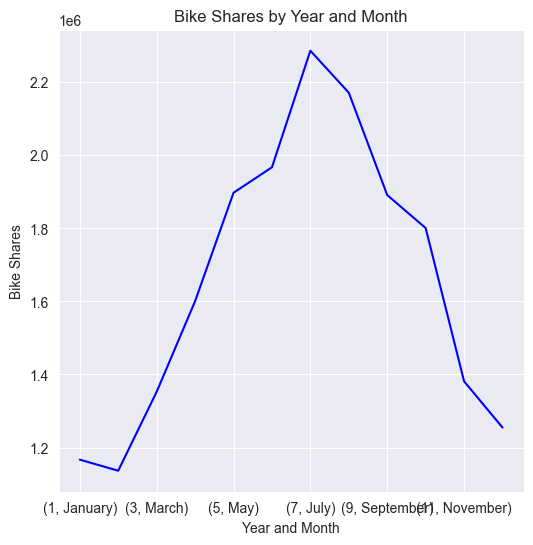

In [390]:
grouped.plot(kind = 'line', figsize = (6, 6), color = 'blue')
plt.xlabel('Year and Month')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Year and Month')
plt.show()

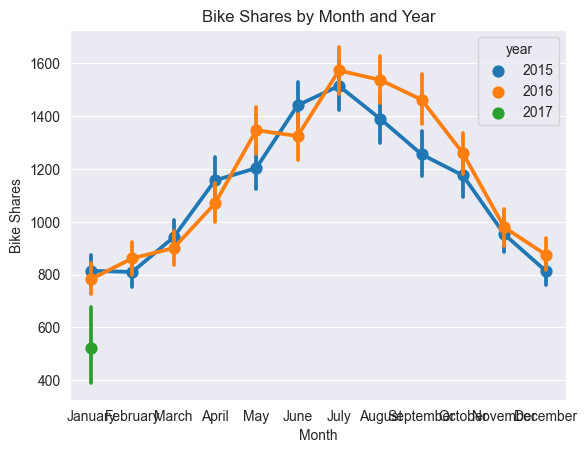

In [392]:
point_plot = df[['year', 'month', 'cnt']]


sns.pointplot(x = 'month', y = 'cnt', data = point_plot, hue='year')
plt.xlabel('Month')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Month and Year')
plt.show()

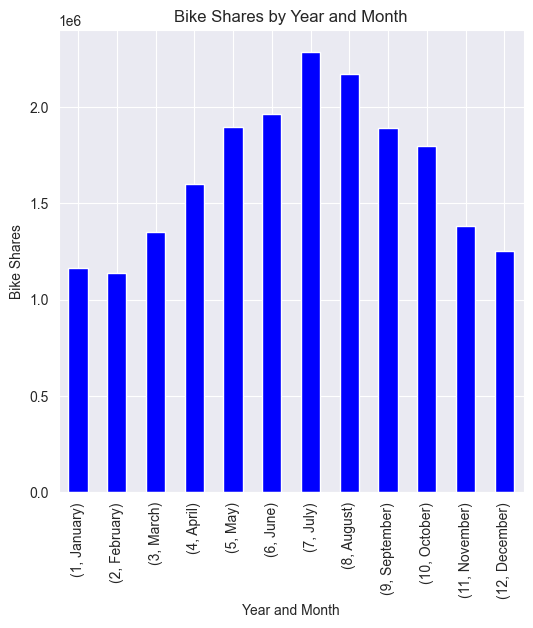

In [393]:
grouped.plot(kind = 'bar', figsize = (6, 6), color = 'blue')
plt.xlabel('Year and Month')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Year and Month')
plt.show()

### 11.Plot bike shares by hours on (holidays, weekend, season)

In [395]:
# with lineplot (*whether it is a holiday or not*)
grouped_mix = df.groupby(['is_holiday', 'is_weekend', 'season'])['cnt'].sum()



is_holiday  is_weekend  season
0.0         0.0         0.0       3454857
                        1.0       4653041
                        2.0       3889779
                        3.0       2755041
            1.0         0.0       1223768
                        1.0       1727753
                        2.0       1183261
                        3.0        722974
1.0         0.0         0.0        171611
                        1.0         43815
                        3.0         80072
Name: cnt, dtype: int64

In [396]:
# with lineplot (*You may want to see seasonal breakdowns*)


In [397]:
# with pointplot


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

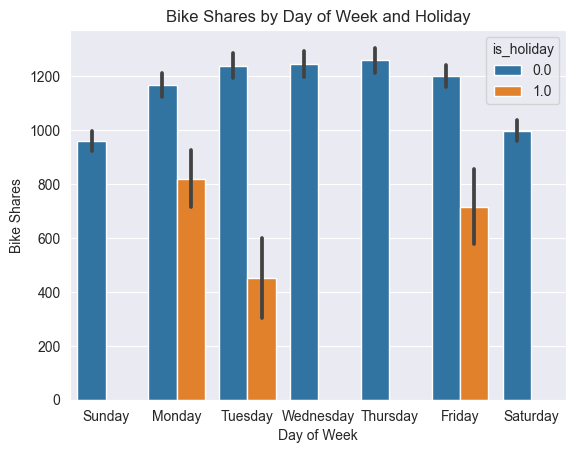

In [398]:
sns.barplot(x = 'day_of_week', y = 'cnt', data = df, hue = 'is_holiday')
plt.xlabel('Day of Week')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Day of Week and Holiday')
plt.show()

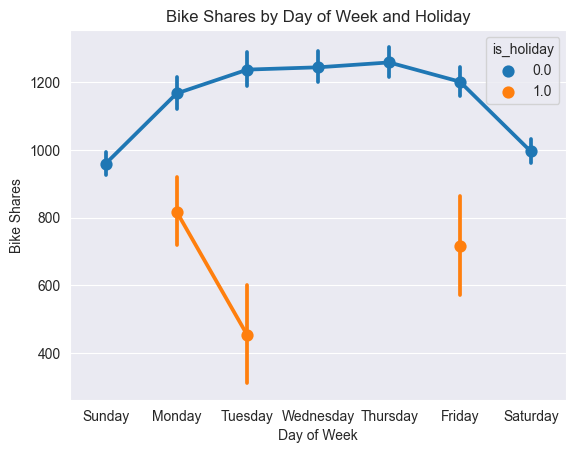

In [399]:
sns.pointplot(x = 'day_of_week', y = 'cnt', data = df, hue = 'is_holiday')
plt.xlabel('Day of Week')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Day of Week and Holiday')
plt.show()

### 13.Plot bike shares by day of month

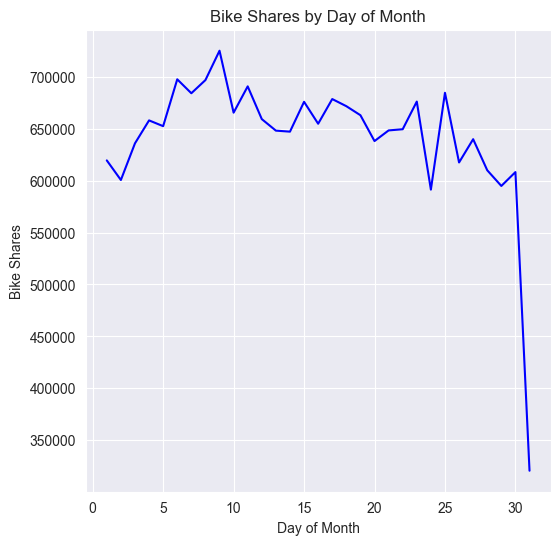

In [400]:
day_of_month = df.groupby(['day_of_month'])['cnt'].sum()

day_of_month.plot(kind = 'line', figsize = (6, 6), color = 'blue')
plt.xlabel('Day of Month')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Day of Month')
plt.show()

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

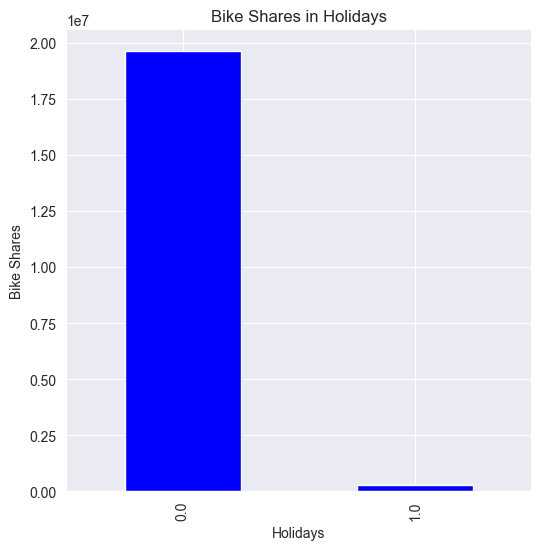

In [401]:
is_holiday = df.groupby(['is_holiday'])['cnt'].sum()

is_holiday.plot(kind = 'bar', figsize = (6, 6), color = 'blue')
plt.xlabel('Holidays')
plt.ylabel('Bike Shares')
plt.title('Bike Shares in Holidays')
plt.show()

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

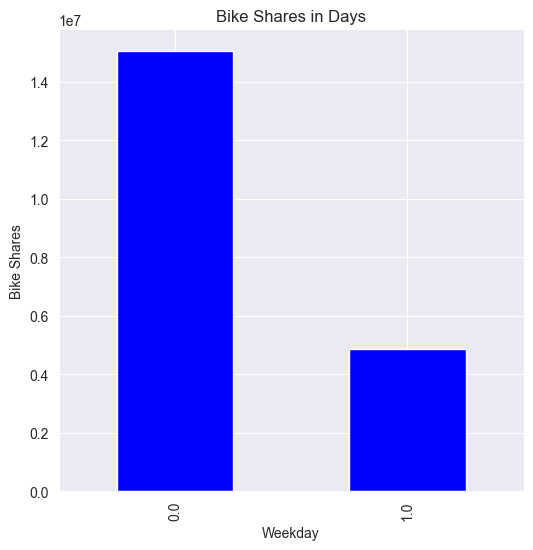

In [402]:
is_weekday = df.groupby(['is_weekend' ])['cnt'].sum()

is_weekday.plot(kind = 'bar', figsize = (6, 6), color = 'blue')
plt.xlabel('Weekday')
plt.ylabel('Bike Shares')
plt.title('Bike Shares in Days')
plt.show()



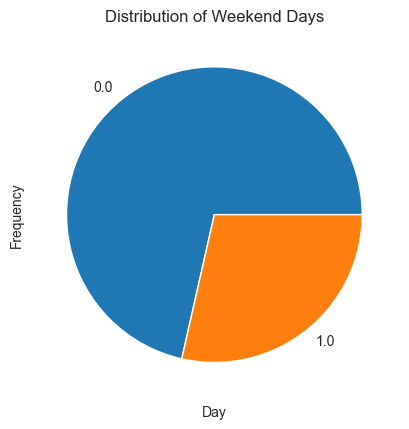

In [403]:
df['is_weekend'].value_counts().plot(kind='pie')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Distribution of Weekend Days')
plt.show()

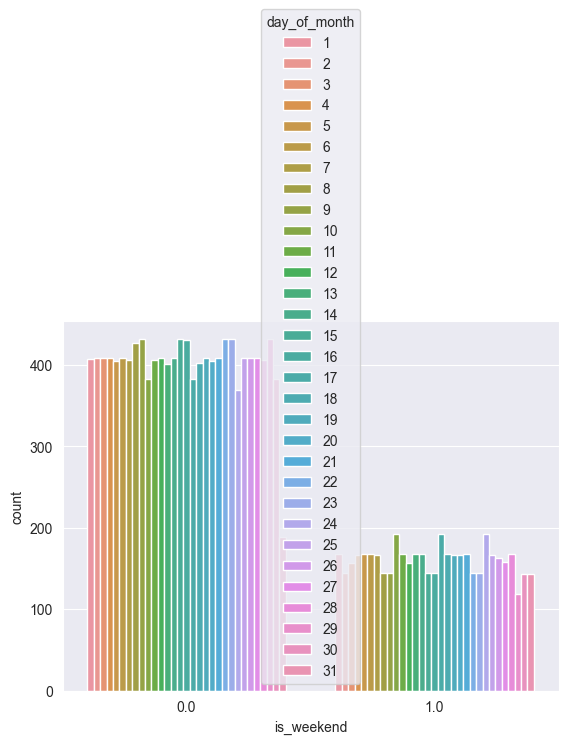

In [404]:
sns.countplot(x='is_weekend', hue='day_of_month', data=df)
plt.show()


### 16.Plot the distribution of weather code by seasons

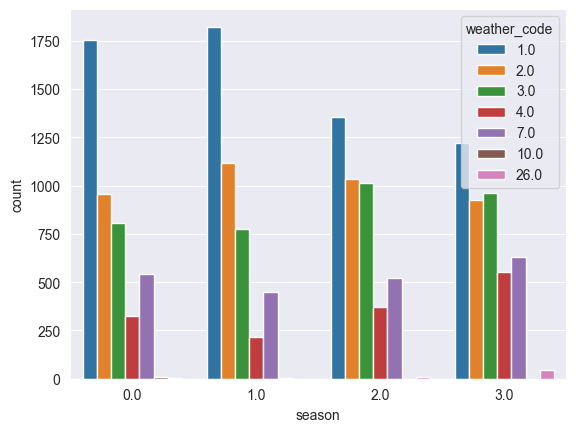

In [405]:
sns.countplot(x='season', hue='weather_code', data=df)
plt.show()

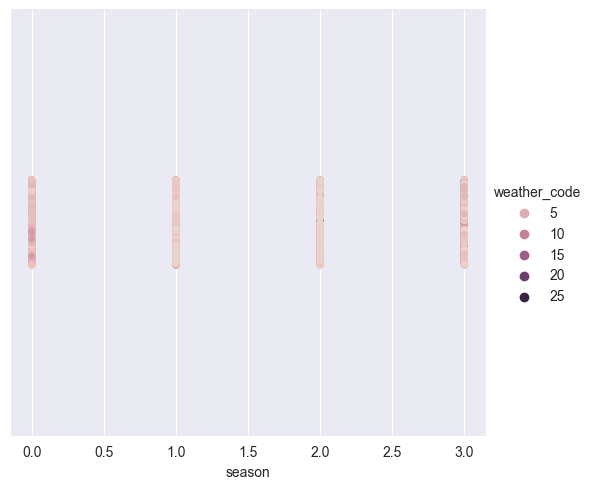

In [406]:
sns.catplot(x='season', hue='weather_code', data=df)
plt.show()